In [1]:
#! /usr/bin/evn python3 
'''
Implementing flat k means
'''
import matplotlib.pyplot as plt
from matplotlib import style

import numpy as np
import pandas as pd
style.use('ggplot')


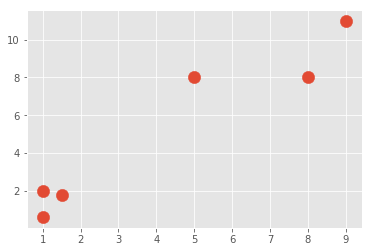

In [2]:
X=np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])
plt.scatter(X[:,0],X[:,1],s=150)
plt.show()

In [8]:
colors =10*['g','r','c','b','k']
class K_Means:
    def __init__(self,k=2,tol=0.001,max_iter=300):
        self.k=k # 种子点个数
        self.tol=tol # 容忍度 即决定种子点是否结束移动
        self.max_iter=max_iter
    
    def fit(self,data):
        
        self.centroids = {}
        
        for i in range(self.k):
            # 初始化种子点
            self.centroids[i] = data[i]
            
        for i in range(self.max_iter):
            self.classifications = {}
            
            for i in range(self.k):
                self.classifications[i] = []
                
            # 该循环执行完成之后 得到self.classifications
            # key:归类 value是样本点的list
            for featureset in data:
                # 计算该样本点到 种子点的距离 得到长度为k的距离list：distances
                # 将最近距离对应的索引以及该样本点存储在classifications中
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
            
            pre_centroids = dict(self.centroids) # 保留上次的种子点
            
            for classification in self.classifications:
                # 更新种子点
                # key不变 
                # value 改为 该分类下所有种子点的平均值
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
            
            # 循环不能一直进行下去
            # 如何判定种子点是否继续移动
            
            optimized = True
            for c in self.centroids:
                original_centroid = pre_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((original_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((original_centroid-original_centroid)/original_centroid*100.0))
                    optimized =True
            
            if optimized:
                break
                
    def predict(self,data):
        distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

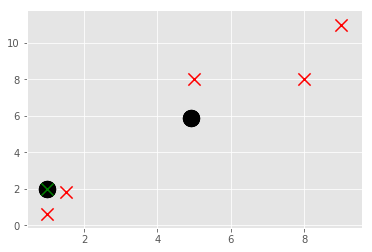

In [11]:
# now we can do the prediction
clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)
    
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

plt.show()